# Set up the library and obtain the data

In [ ]:
pip install riskfolio-lib

In [ ]:
pip install yahoo_fin

In [3]:
import riskfolio as rp
import pandas as pd
import numpy as np
import yahoo_fin.stock_info as si

import time

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Specify the assets
assets = ['AMZN', 'NFLX', 'FB', 'GOOGL', 'AAPL', 'MSFT', 'SAGE', 'ATH',
          'ZION', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO','HPQ',  'T', 'BA' ]
assets.sort()

In [5]:
# Download the Data
pd.set_option('precision', 3)

assets_historical = {}
for asset in assets:
  assets_historical[asset] = si.get_data(asset, start_date="01/01/2017", 
                                         end_date = "06/06/2021",
                                         index_as_date = False, interval="1d")

# Concatenate the dataframes  
data = pd.concat(assets_historical)
data.reset_index(drop=True, inplace=True)

# Create a pivot table
data = data.pivot(index='date', columns='ticker', values = 'adjclose')
data.head(5)

ticker,AAPL,AMZN,ATH,BA,BMY,FB,GOOGL,HPQ,LUV,MSFT,NFLX,PCAR,SAGE,T,TMO,TXT,ZION
date,,,,,,,,,,,,,,,,,
2017-01-03,27.372,753.67,47.82,145.534,51.652,116.86,808.01,12.962,48.195,58.292,127.49,55.350,50.77,32.315,141.882,48.888,38.540
2017-01-04,27.342,757.18,48.03,147.063,51.722,118.69,807.77,13.163,49.468,58.031,129.41,56.113,52.62,32.127,143.353,49.930,39.093
2017-01-05,27.481,780.45,47.20,147.147,52.588,120.67,813.02,13.154,48.667,58.031,131.81,55.198,53.21,32.037,143.570,49.861,38.459
2017-01-06,27.787,795.99,47.12,147.509,52.430,123.41,825.21,13.093,48.147,58.534,131.07,55.825,53.74,31.399,145.437,49.494,38.709
2017-01-09,28.042,796.92,46.93,146.785,52.238,124.90,827.18,12.813,48.503,58.348,130.95,55.139,53.37,31.003,145.654,49.176,38.290


In [6]:
data.isnull().values.any()

False

In [7]:
returns = data[assets].pct_change().dropna()
returns.head()

ticker,AAPL,AMZN,ATH,BA,BMY,FB,GOOGL,HPQ,LUV,MSFT,NFLX,PCAR,SAGE,T,TMO,TXT,ZION
date,,,,,,,,,,,,,,,,,
2017-01-04,-0.001,0.005,0.004,1.051e-02,0.001,0.016,-2.970e-04,1.549e-02,0.026,-4.474e-03,1.506e-02,0.014,0.036,-5.812e-03,0.010,0.021,0.014
2017-01-05,0.005,0.031,-0.017,5.674e-04,0.017,0.017,6.499e-03,-6.632e-04,-0.016,0.000e+00,1.855e-02,-0.016,0.011,-2.806e-03,0.002,-0.001,-0.016
2017-01-06,0.011,0.020,-0.002,2.457e-03,-0.003,0.023,1.499e-02,-4.645e-03,-0.011,8.668e-03,-5.614e-03,0.011,0.010,-1.992e-02,0.013,-0.007,0.006
2017-01-09,0.009,0.001,-0.004,-4.903e-03,-0.004,0.012,2.387e-03,-2.133e-02,0.007,-3.183e-03,-9.156e-04,-0.012,-0.007,-1.258e-02,0.001,-0.006,-0.011
2017-01-10,0.001,-0.001,-0.004,4.737e-03,0.004,-0.004,-1.414e-03,6.812e-04,0.021,-3.193e-04,-8.095e-03,0.018,0.009,2.452e-04,0.002,0.008,0.015


In [ ]:
# Available risk measures

# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# Source: Riskfolio-Lib

# Classic Mean Risk Optimization

In [8]:
portfolio = rp.Portfolio(returns=returns)

# Specify methods
method_mu = 'hist' # Expected returns
method_cov = 'hist' # Covariance matrix

portfolio.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

model='Classic' # Can also be BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure
obj = 'Sharpe' # Objective function
hist = True # Use historical scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist) # w for "weights"

display(w)

,weights
AAPL,2.100e-01
AMZN,2.478e-01
ATH,3.494e-08
BA,5.894e-08
BMY,4.408e-08
FB,6.849e-08
GOOGL,9.416e-08
HPQ,6.756e-07
LUV,4.790e-08
MSFT,1.590e-01


In [ ]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [ ]:
pip uninstall matplotlib

In [ ]:
pip install matplotlib==3.1.3

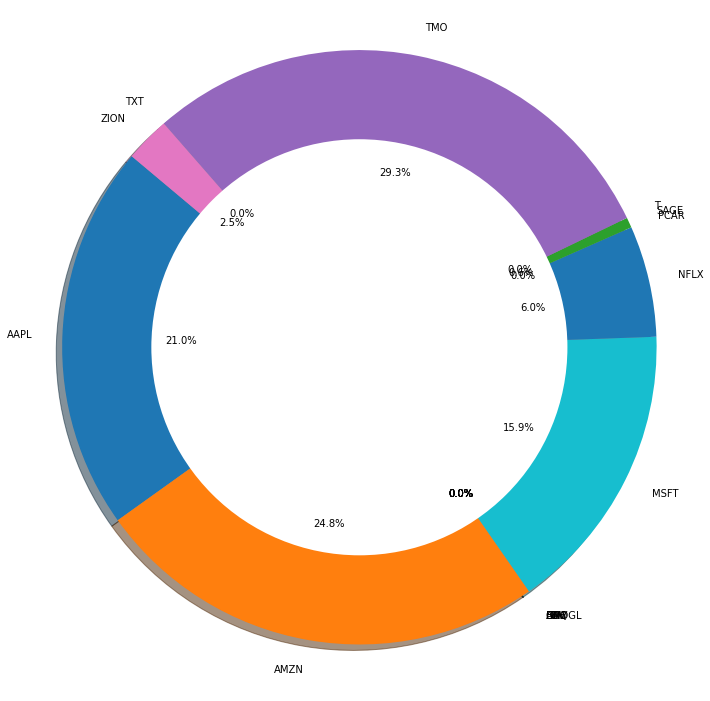

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 10))
plt.pie(w, labels=assets,autopct='%1.1f%%', shadow=True, startangle=140)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.tight_layout()
plt.show()

In [10]:
points = 50 # Number of points of the frontier

frontier = portfolio.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,ATH,BA,BMY,FB,GOOGL,HPQ,LUV,MSFT,NFLX,PCAR,SAGE,T,TMO,TXT,ZION
0,2.987e-10,0.150,1.240e-10,1.170e-10,0.244,7.658e-04,1.649e-09,4.741e-10,0.016,3.382e-10,0.016,0.122,1.368e-10,0.300,0.151,1.581e-10,3.267e-09
1,1.460e-08,0.199,2.452e-09,2.622e-09,0.196,1.007e-06,6.082e-08,1.508e-08,0.012,1.251e-08,0.029,0.120,3.313e-09,0.202,0.214,3.021e-09,2.825e-02
2,2.854e-09,0.219,2.772e-10,3.082e-10,0.175,1.270e-08,4.444e-09,1.940e-09,0.009,1.828e-09,0.035,0.119,4.079e-10,0.160,0.240,3.382e-10,4.225e-02
3,1.506e-03,0.234,3.210e-10,3.750e-10,0.160,1.062e-08,1.197e-08,1.658e-08,0.007,4.303e-09,0.039,0.117,5.719e-10,0.128,0.260,3.879e-10,5.299e-02
4,1.622e-02,0.239,4.894e-10,5.850e-10,0.147,1.184e-08,1.981e-08,2.339e-03,0.005,1.000e-08,0.041,0.113,9.106e-10,0.104,0.272,5.893e-10,6.052e-02


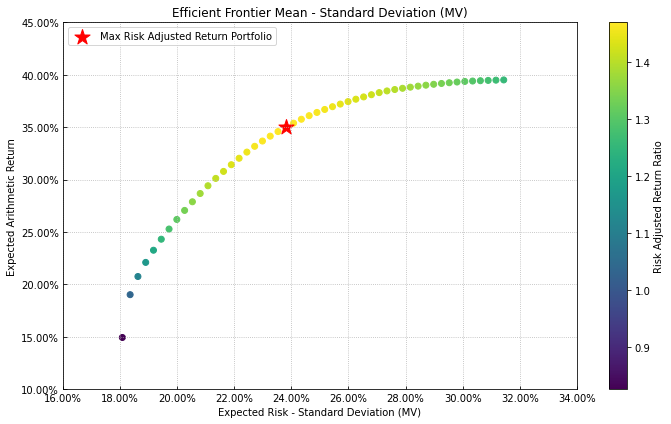

In [32]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = portfolio.mu
cov = portfolio.cov
returns = portfolio.returns

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

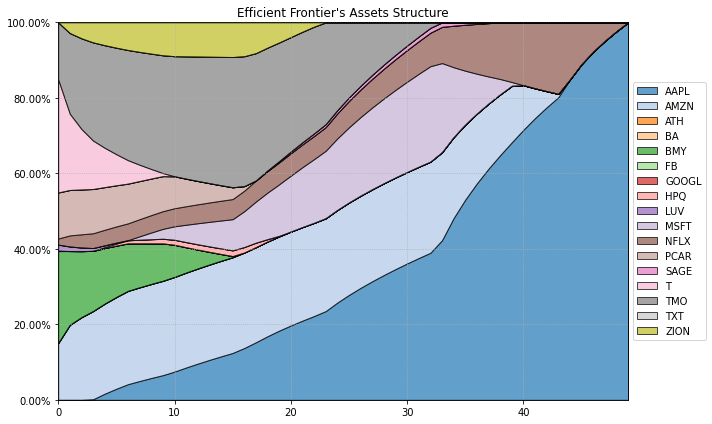

In [33]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

# Report

In [ ]:
returns_ = portfolio.returns

ax = rp.jupyter_report(returns_,
                       w,
                       rm=rm,
                       rf=0,
                       alpha=0.05,
                       others=0.05,
                       nrow=25,
                       height=6,
                       width=14,
                       t_factor=252,
                       ini_days=1,
                       days_per_year=252,
                       bins=50,
                       )

In [37]:
rp.excel_report(returns_,
                w,
                rf=0,
                alpha=0.05,
                t_factor=252,
                ini_days=1,
                days_per_year=252,
                name="report")

# EVaR Optimization

In [45]:
portfolio.solvers = ['MOSEK']
portfolio.alpha = 0.05 # Significance level for EVaR
model='Classic'
rm = 'EVaR'
obj = 'Sharpe' # Objective function
hist = True # Use historical scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor

w = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

The problem doesn't have a solution with actual input parameters


None

# HRP Optimization

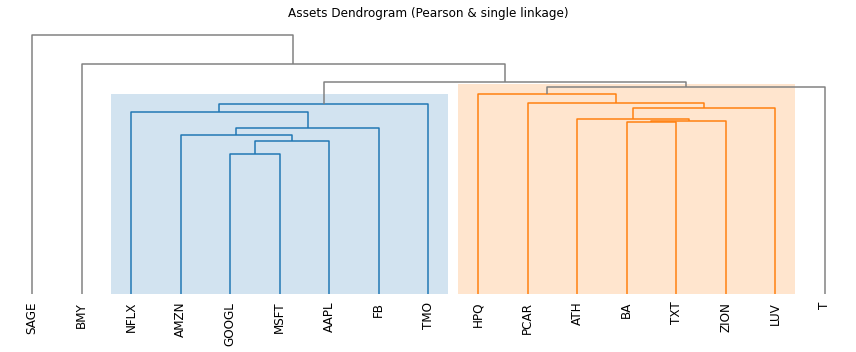

In [48]:
ax = rp.plot_dendrogram(returns=returns,
                        codependence='pearson',
                        linkage='single',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

In [51]:
portfolio = rp.HCPortfolio(returns=returns)


model = 'HRP'
codependence = 'pearson' # Correlation
rm = 'MV' # Risk measure used
rf = 0 # Risk free rate
linkage = 'single' # Linkage method
max_k = 10 # Max number of clusters used in two difference gap statistic
leaf_order = True

w = portfolio.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w)

,weights
AAPL,0.051
AMZN,0.075
ATH,0.032
BA,0.024
BMY,0.150
FB,0.044
GOOGL,0.059
HPQ,0.058
LUV,0.032
MSFT,0.057


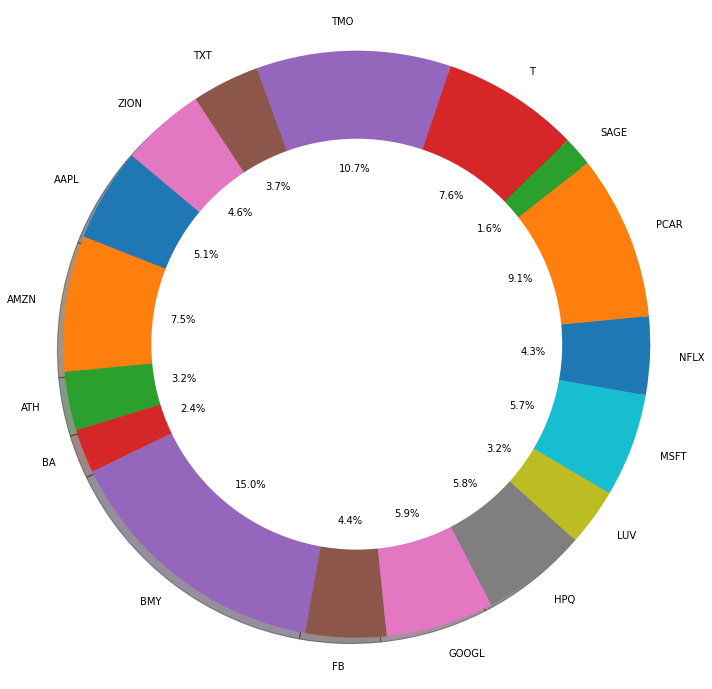

In [54]:
fig = plt.figure(figsize =(10, 10))
plt.pie(w, labels=assets,autopct='%1.1f%%', shadow=True, startangle=140)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.tight_layout()
plt.show()

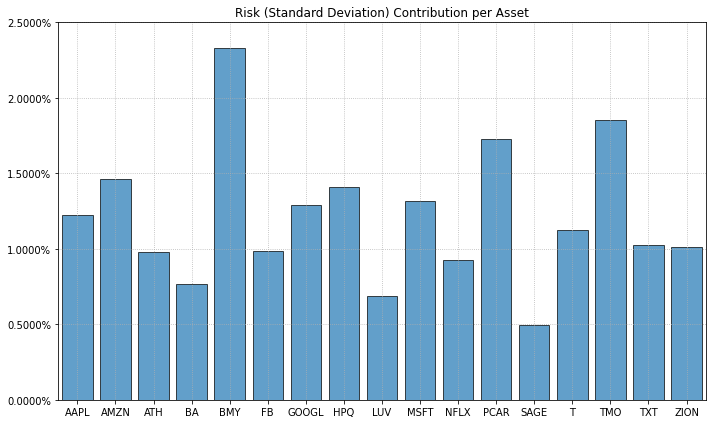

In [55]:
mu = returns.mean()
cov = returns.cov()

ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)